In [1]:
from keras.models import load_model
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


#********************************************
#**************to complete*******************
#********************************************
path_to_saved_model = '' #without the /
folder_path = '' #where the images to predict are. add '*' 
my_saved_model = load_model(path_to_saved_model+'/segmentation_model.hdf5', custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [2]:
import glob

file_paths = glob.glob(folder_path)
print(file_paths)

['K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\1.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\10.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\11.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\12.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\13.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\14.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\15.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\16.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\17.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\18.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\19.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\2.JPEG', 'K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\\3.JPEG', 'K:/Docs/stage

In [3]:
import cv2

im_array = []
for i in file_paths:
    print(i)
    im = cv2.resize(cv2.imread(i), (128, 128))[:,:,0] 
    im_array.append(im)
        

K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\1.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\10.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\11.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\12.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\13.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\14.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\15.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\16.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\17.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\18.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\19.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\2.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\3.JPEG
K:/Docs/stage_ingenieur/models/datas/cxrs/pathological/anonymes\4.J

In [4]:
import numpy as np

dim = 128
images = np.array(im_array).reshape(len(file_paths), dim, dim, 1)

In [5]:
from matplotlib import pyplot as plt


predictions = my_saved_model.predict(images)


1/1 [==============================] - 1s 829ms/step


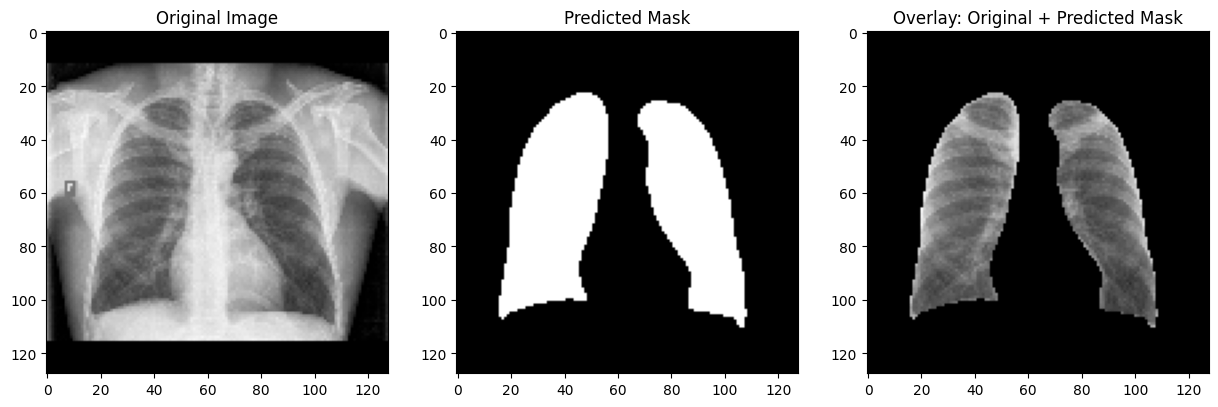

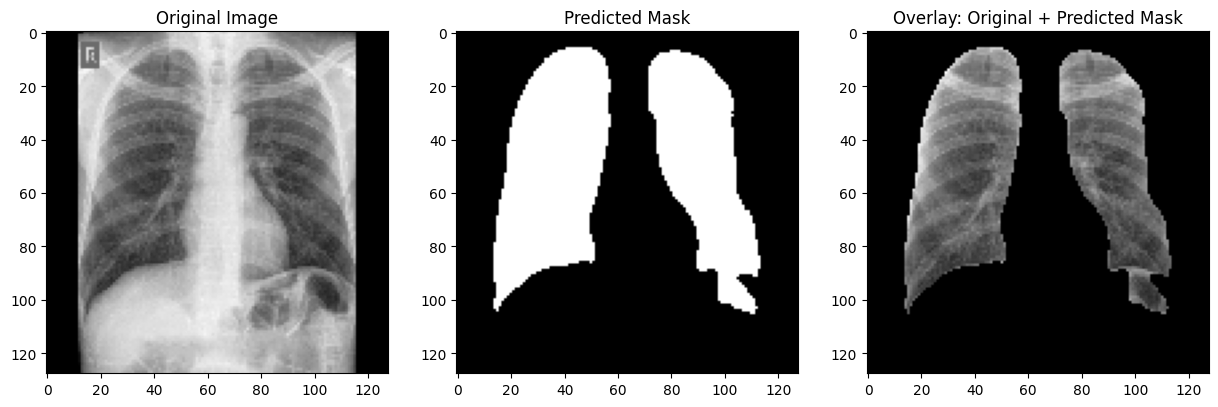

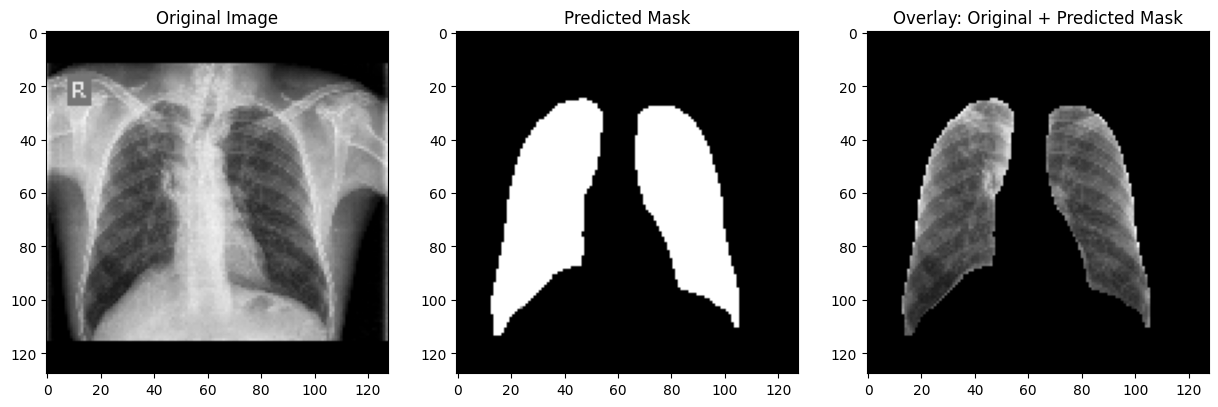

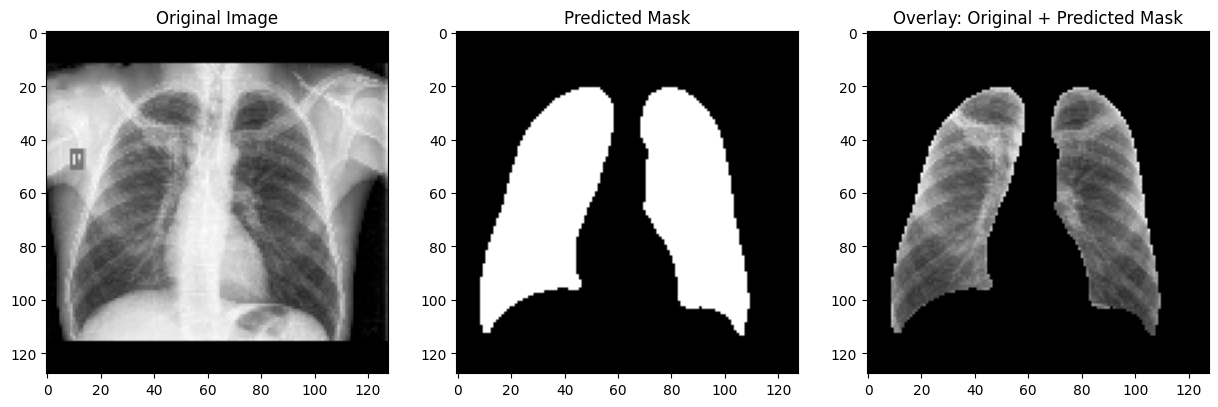

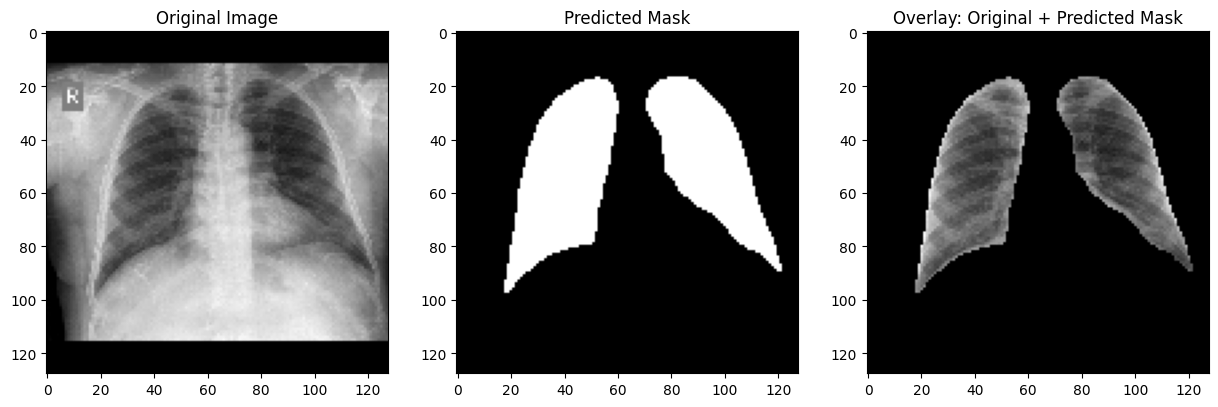

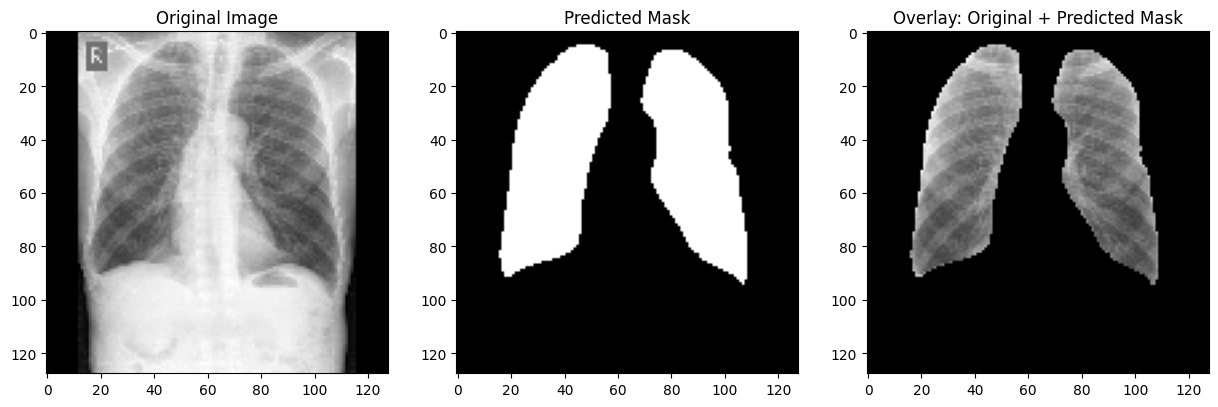

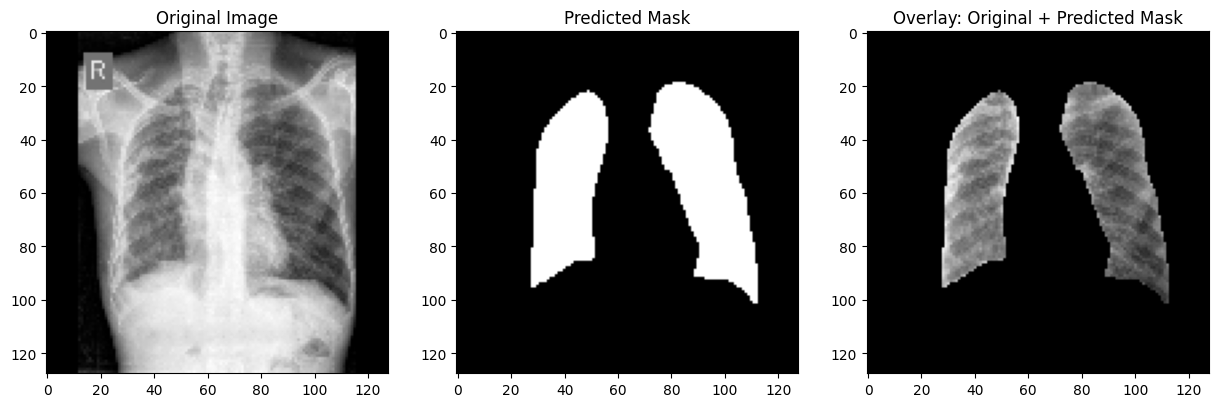

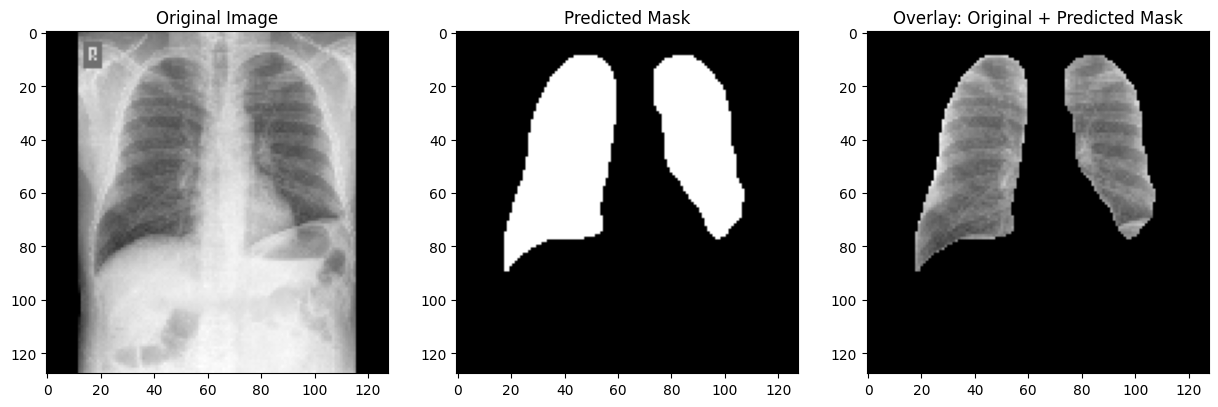

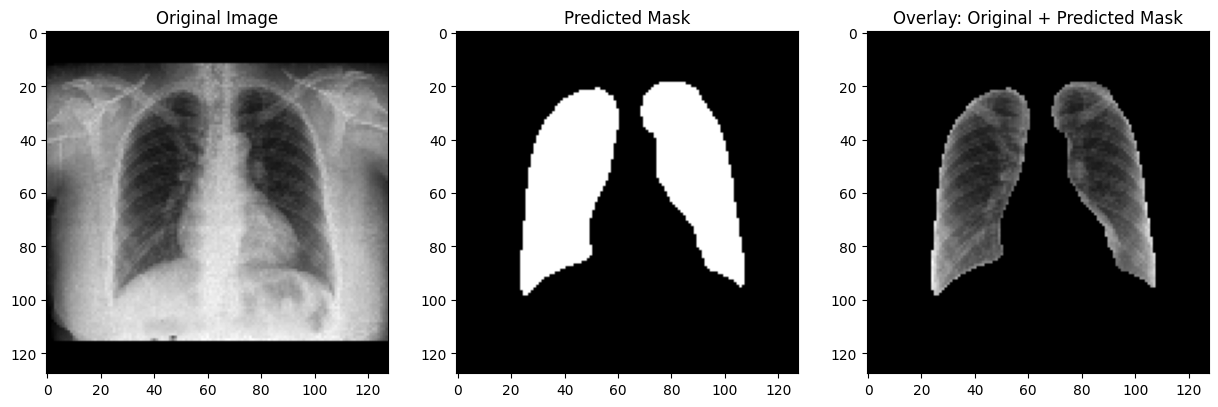

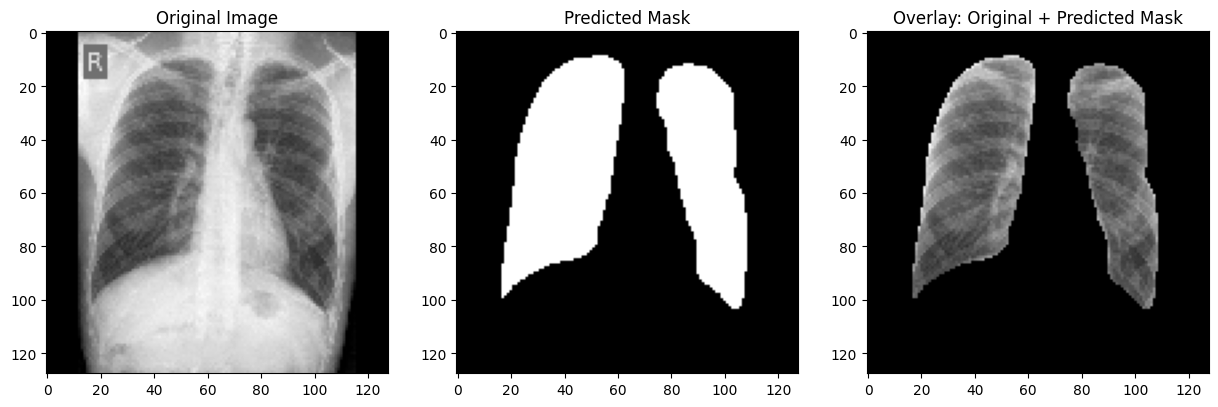

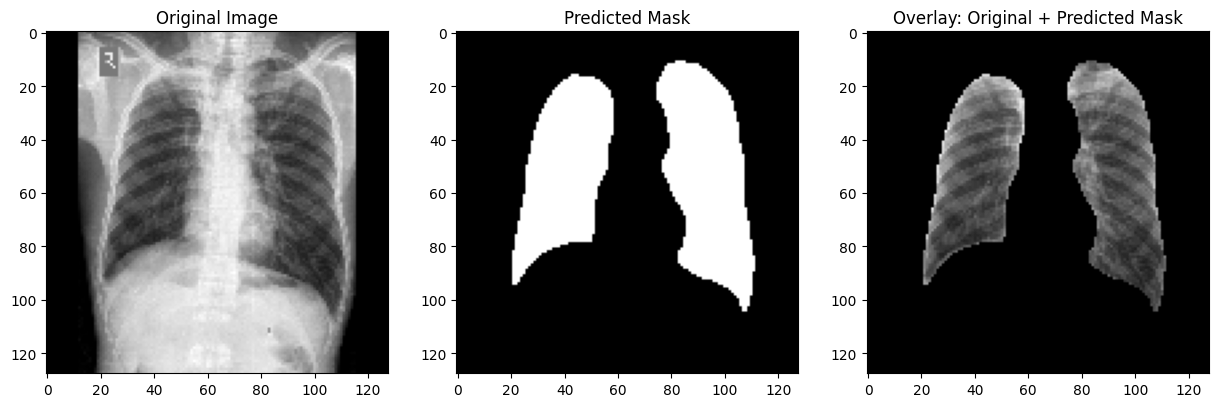

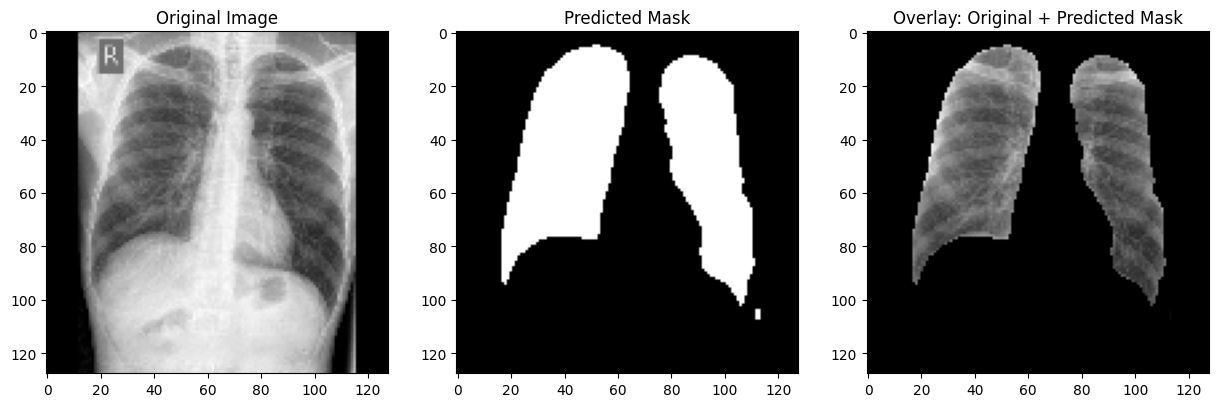

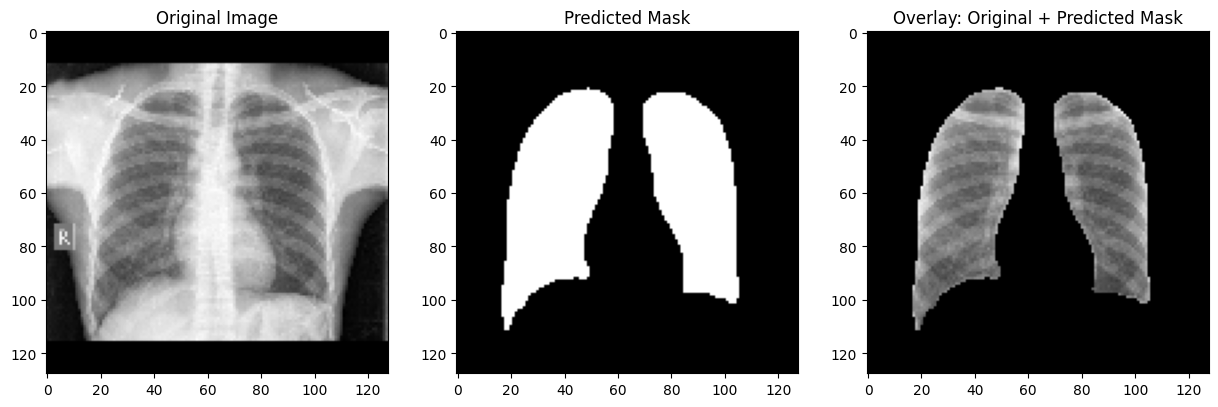

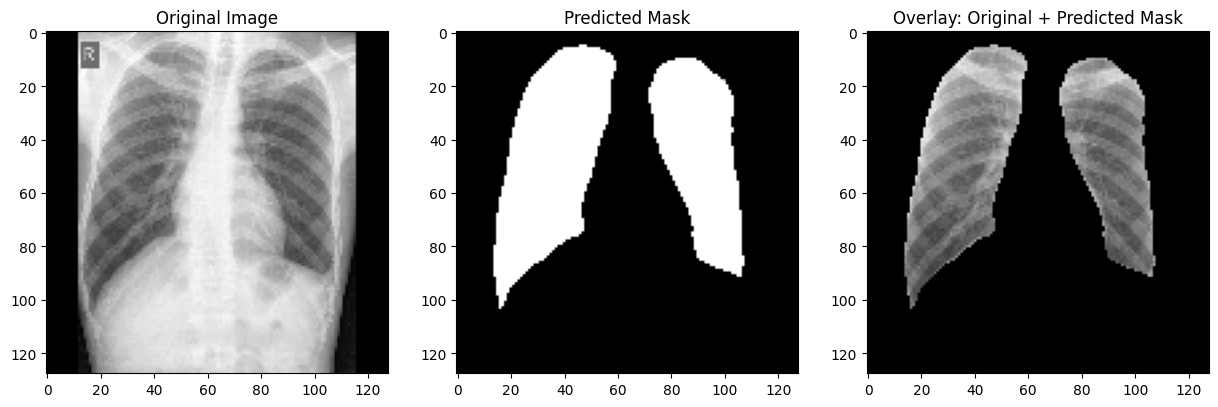

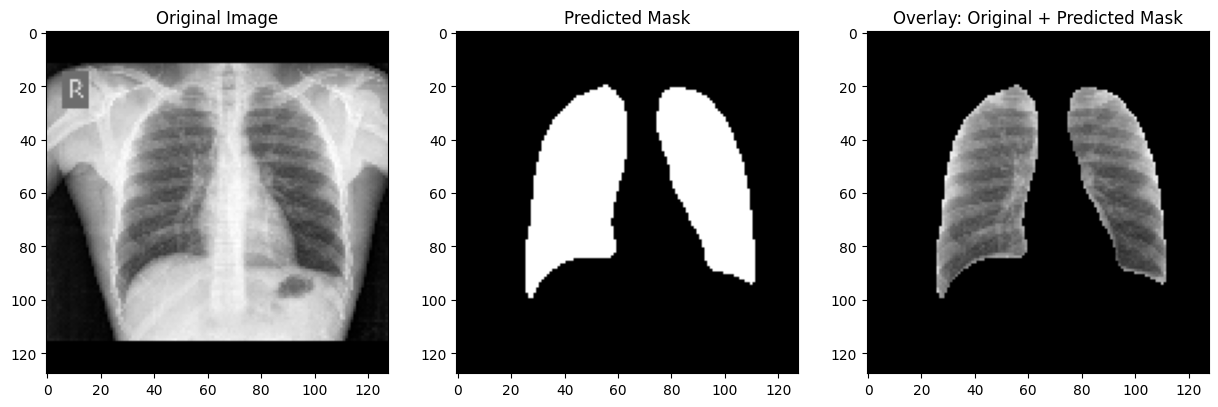

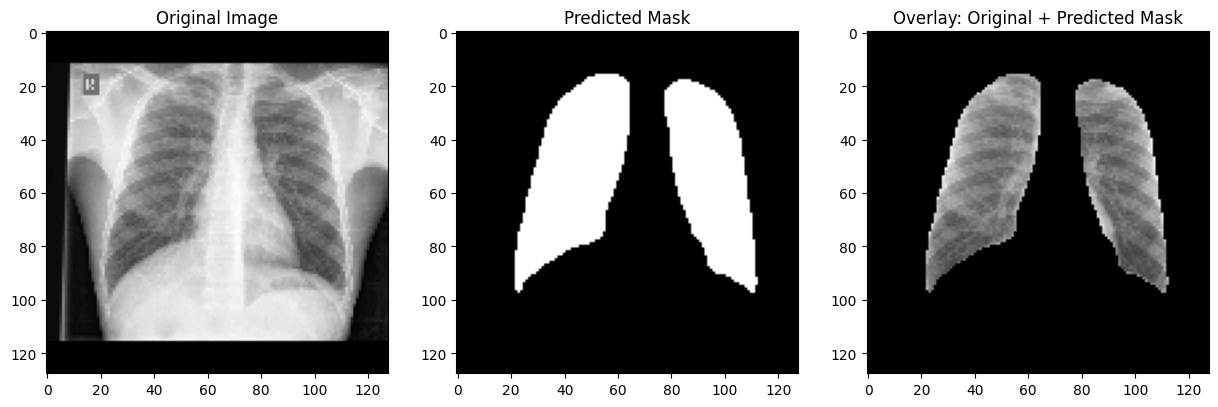

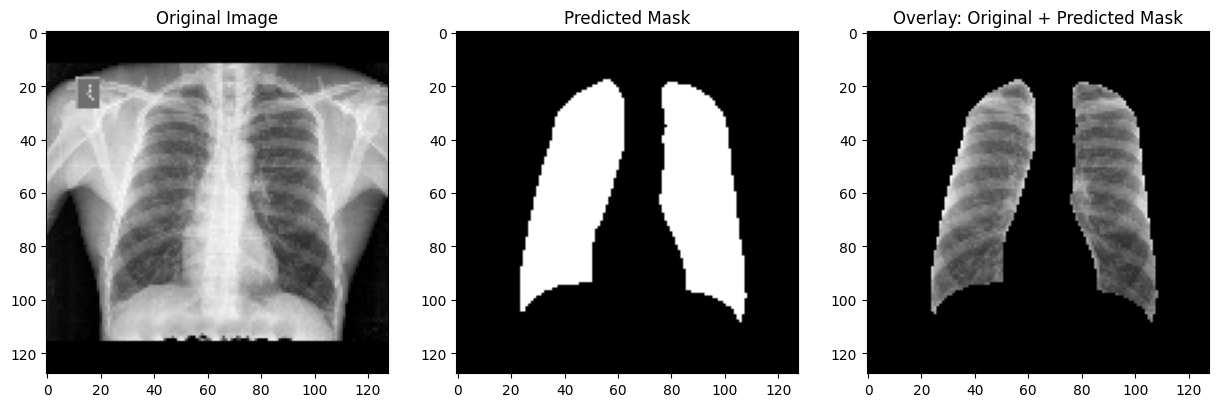

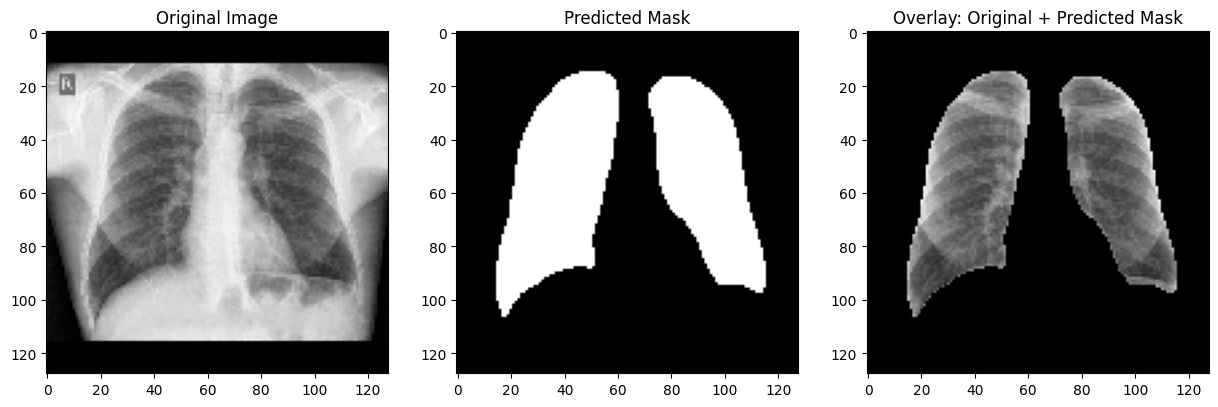

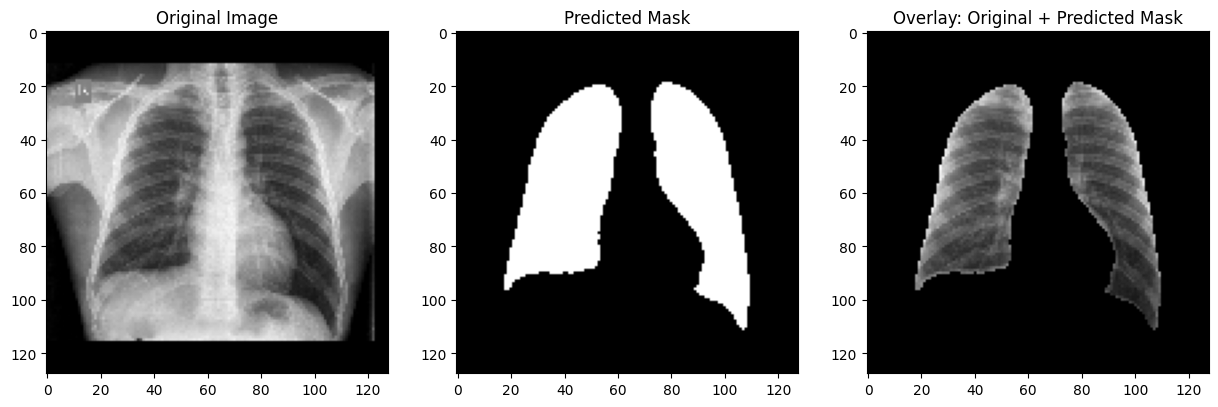

In [16]:
import os

masked_images = []
for i in range(len(images)):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(predictions[i], cmap='gray')
    plt.title('Predicted Mask')

    # Create a binary mask based on the predicted mask
    binary_mask = (predictions[i] > 0).astype(np.uint8)

    # Apply the binary mask to the original image
    masked_image = cv2.bitwise_and(images[i], images[i], mask=binary_mask)
    masked_images.append(masked_image)
    
    # Overlay the mask on the original image
    plt.subplot(1, 3, 3)
    plt.imshow(masked_image, cmap='gray')
    plt.title('Overlay: Original + Predicted Mask')

    # Save the masked image in the current directory
    filename = f"masked_image_{i}.png"
    filepath = os.path.join(os.getcwd(), filename)
    cv2.imwrite(filepath, masked_image)


    plt.show()